In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Ex 1

In [45]:
df = pd.read_csv('state.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [4]:
df.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

In [5]:
df.isnull().mean()

State           0.0
Population      0.0
Murder.Rate     0.0
Abbreviation    0.0
dtype: float64

In [7]:
df.isnull().sum()/len(df)

State           0.0
Population      0.0
Murder.Rate     0.0
Abbreviation    0.0
dtype: float64

In [8]:
df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


<AxesSubplot:>

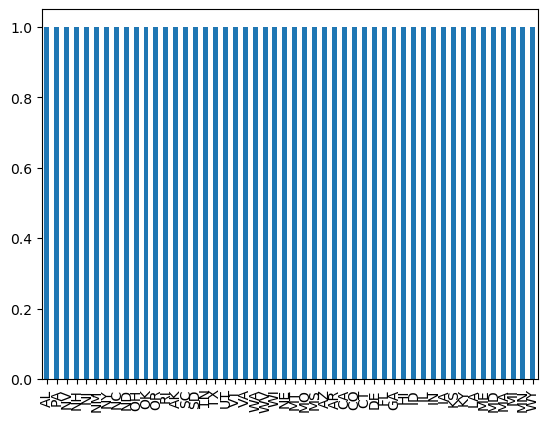

In [25]:
cat_var = 'Abbreviation'
df[cat_var].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Scatter plot of Population and Murder Rate')

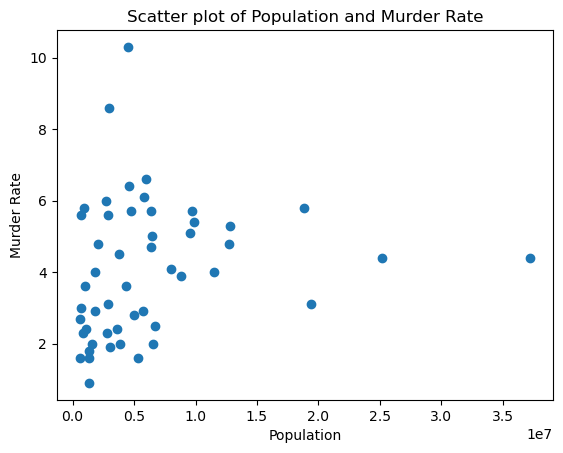

In [28]:
plt.scatter(df['Population'], df['Murder.Rate'])
plt.xlabel('Population')
plt.ylabel('Murder Rate')
plt.title('Scatter plot of Population and Murder Rate')

In [46]:
# create a grouping so we can plot boxplot for two groups of states 
df['grouping'] = np.where(df['Abbreviation'].str.startswith(('A','E','I','O','U')), 'group 1', 'group 2')

In [47]:
df['grouping'].value_counts()

group 2    38
group 1    12
Name: grouping, dtype: int64

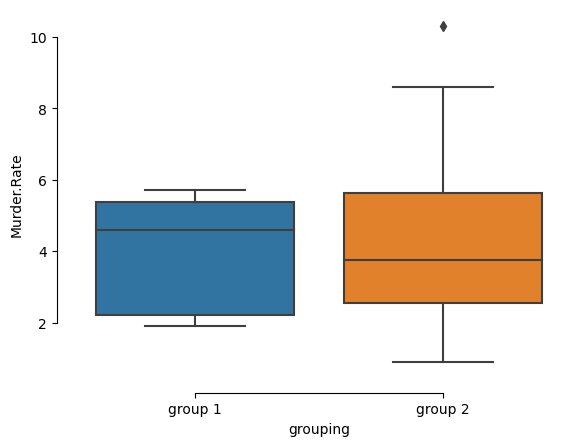

In [48]:
# sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="grouping", y="Murder.Rate",
#             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

## Ex. 2

In [50]:
df = pd.read_csv('loans_income.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [13]:
df.describe()

,x
count,50000.00000
mean,68760.51844
std,32872.03537
min,4000.00000
25%,45000.00000
50%,62000.00000
75%,85000.00000
max,199000.00000


In [39]:
# take a random sample of size=1000
sample1 = np.random.choice(df['x'], 1000)
sample1.shape

(1000,)

(array([1.63377336e-06, 1.08918224e-06, 2.45066004e-06, 6.26279789e-06,
        2.99525117e-06, 1.22533002e-05, 1.17087091e-05, 1.25255958e-05,
        1.08918224e-05, 1.60654381e-05, 1.41593691e-05, 1.63377336e-05,
        9.25804906e-06, 1.36147780e-05, 1.66100292e-05, 1.19810047e-05,
        7.89657125e-06, 1.06195269e-05, 1.27978913e-05, 4.35672897e-06,
        9.53034462e-06, 1.08918224e-05, 5.99050233e-06, 3.53984229e-06,
        6.53509345e-06, 4.62902453e-06, 7.07968457e-06, 5.44591121e-07,
        1.63377336e-06, 4.62902453e-06, 5.17361565e-06, 8.16886681e-07,
        2.45066004e-06, 1.63377336e-06, 8.16886681e-07, 1.63377336e-06,
        1.36147780e-06, 2.45066004e-06, 8.16886681e-07, 2.72295560e-07,
        1.08918224e-06, 0.00000000e+00, 2.72295560e-07, 8.16886681e-07,
        5.44591121e-07, 2.72295560e-07, 5.44591121e-07, 5.44591121e-07,
        0.00000000e+00, 2.72295560e-07]),
 array([ 11376.  ,  15048.48,  18720.96,  22393.44,  26065.92,  29738.4 ,
         33410.88,  

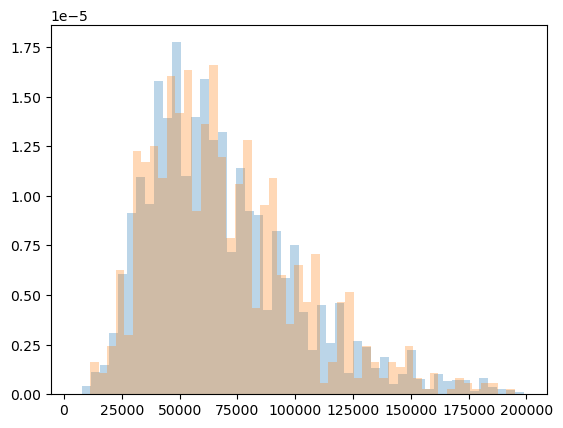

In [41]:
# bins = # pre-specify bins

plt.hist(df['x'], bins=50, density=True, alpha=0.3)
plt.hist(sample1, bins=50, density=True, alpha=0.3)

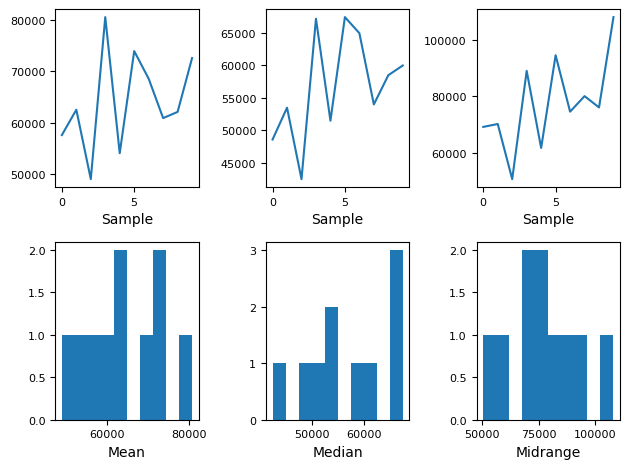

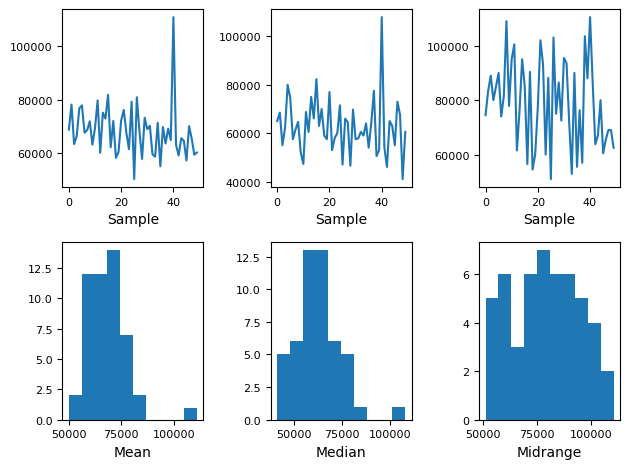

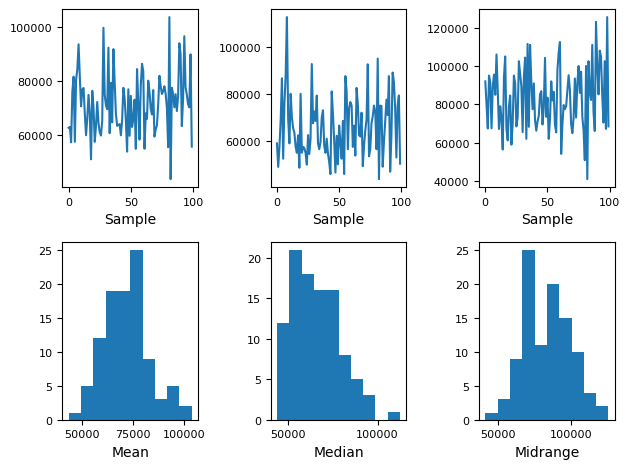

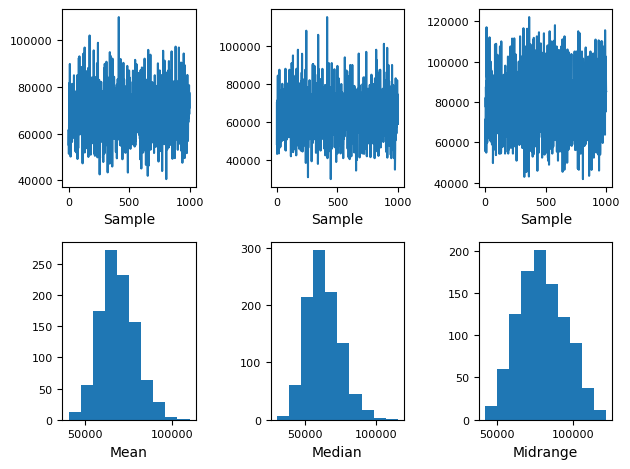

In [53]:
# take and plot bootstrap samples of size 10

sample_size = 10
num_samples = [10, 50, 100, 1000]

for num in num_samples:
    pd.plotting.bootstrap_plot(df, size=sample_size, samples=num)

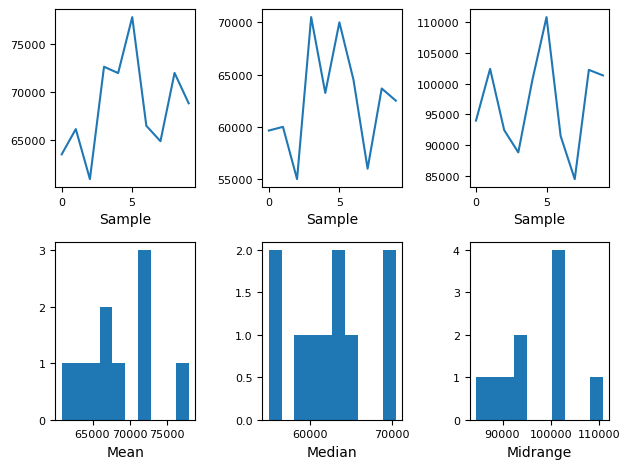

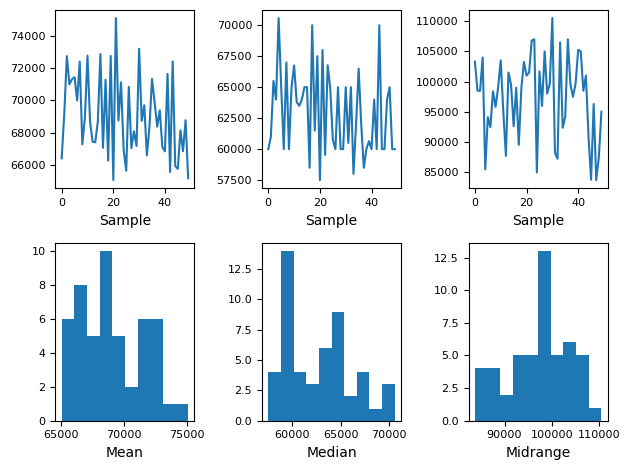

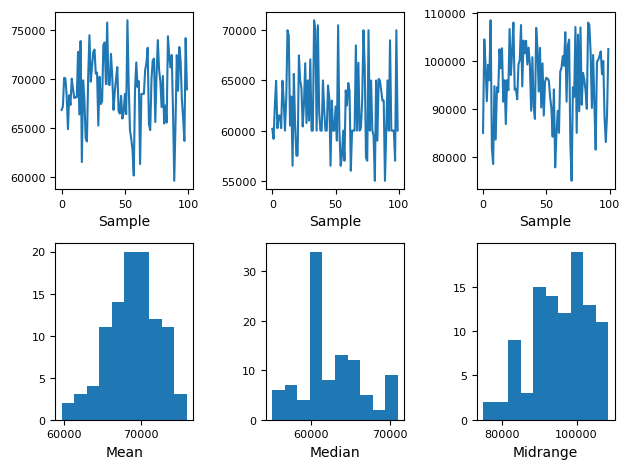

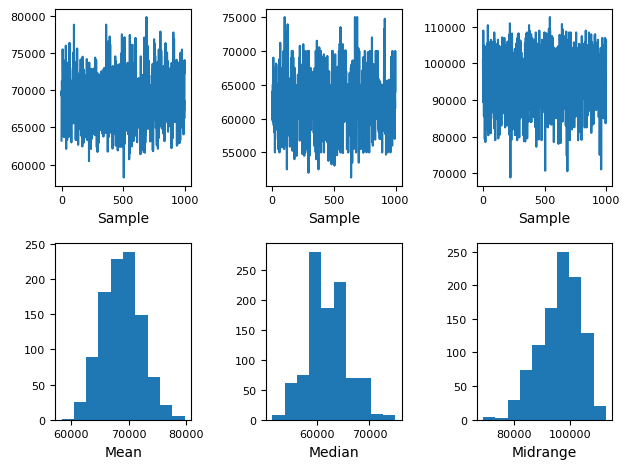

In [54]:
# take and plot bootstrap samples of size 10

sample_size = 100
num_samples = [10, 50, 100, 1000]

for num in num_samples:
    pd.plotting.bootstrap_plot(df, size=sample_size, samples=num)

In [59]:
bootstrap_means_10 = {}
num_samples = [10, 50, 100, 1000]

for num in num_samples:
    bootstrap_means_10[num] = []
    for i in range(num):
        sample_mean = np.mean(np.random.choice(df['x'], 10))
        bootstrap_means_10[num].append(sample_mean)

In [61]:
bootstrap_means_100 = {}
num_samples = [10, 50, 100, 1000]

for num in num_samples:
    bootstrap_means_100[num] = []
    for i in range(num):
        sample_mean = np.mean(np.random.choice(df['x'], 100))
        bootstrap_means_100[num].append(sample_mean)

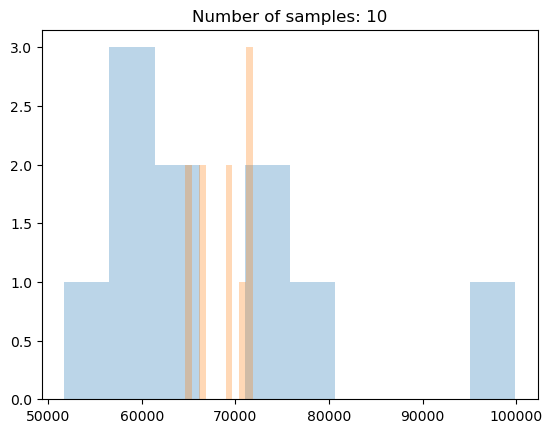

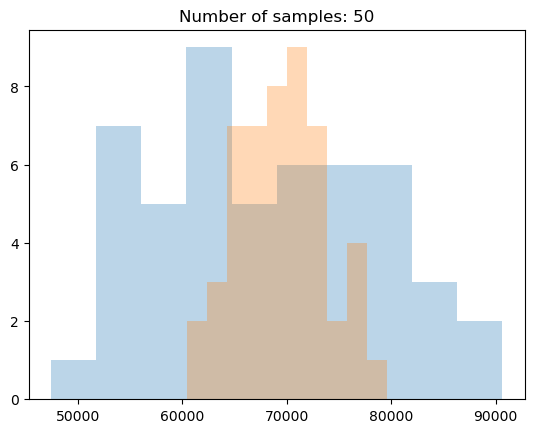

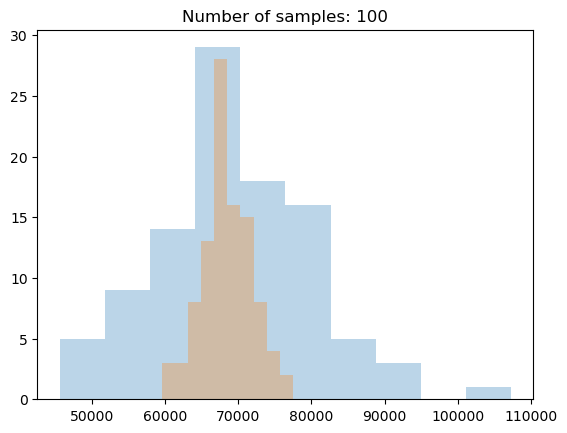

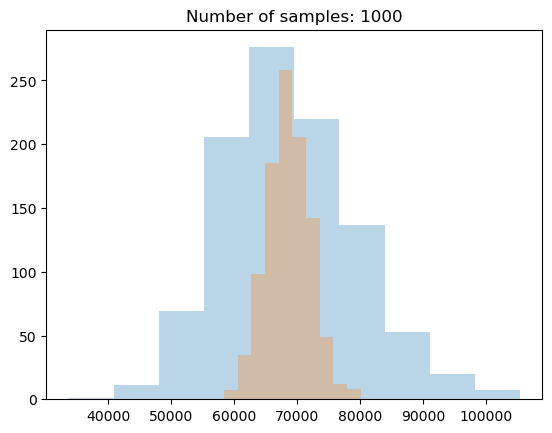

In [64]:
for num in num_samples:
    plt.figure()
    plt.hist(bootstrap_means_10[num], label='sample size=10', alpha=0.3)
    plt.hist(bootstrap_means_100[num], label='sample size=100', alpha=0.3)
    plt.title(f'Number of samples: {num}')

## Ex.3


1.

Two side tests, because in the problem description, there is no significant expectation for the test to provide evidence to be larger or smaller than the claimed number. (In real-world application, recommended to talk to your customer, to align your test with their expectation)

Z-test (assuming mu and sigma are known from the problem)
 
(65-60)/(30/sqrt(36)) = 1 < 1.96 = Z_0.975 

Therefore, there is not enough evidence to contradict the company claim of 60 seconds car renting average time.

Follow class1 slides page 52 formula to calculate:

Power = Pr{Z<-1.96-sqrt(36)*(65-60)/30} + Pr(Z>1.96-sqrt(36)*(65-60)/30)
= Pr{Z<-2.96-} + Pr(Z>0.96) = 0.00145 + 0.16853 = 0.16998


2. 


Then this choice will be right-sided with the design sample size calculation.

Power = Pr(Z > Z_0.95 - sqrt(n) * (67-60)/30)) = 0.85 

Pr(Z>1.645 -  sqrt(n)*(67-60)/30)) = 0.85

1.645 -  sqrt(n)*(7/30)) = -1.035

N= sq((1.645+1.035) * 30/7) = 132